In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

import DeepINN as dp

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


In [2]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [0,0], [1,0], [0,1]) # unit square
C = dp.domains.Circle(X, [0,0], 1) # unit circle

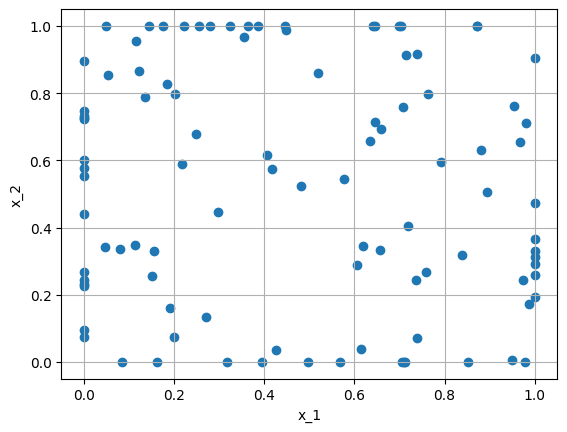

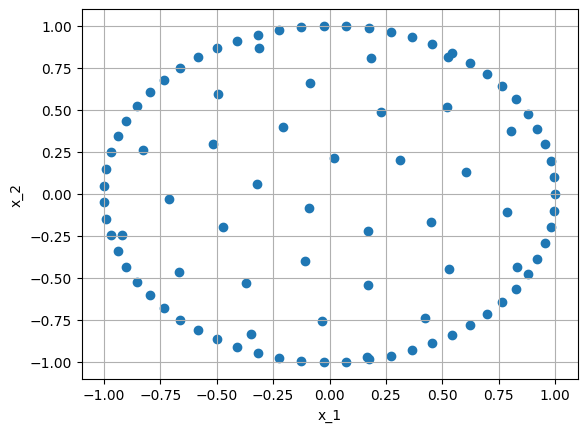

In [5]:
random_R = dp.samplers.RandomUniformSampler(R, n_points=50) + dp.samplers.RandomUniformSampler(R.boundary, n_points=50) # 50 random points
grid_C = dp.samplers.GridSampler(C, density=10) + dp.samplers.GridSampler(C.boundary, density=10) # grid points with density 10

dp.utils.scatter(X, random_R)
dp.utils.scatter(X, grid_C)

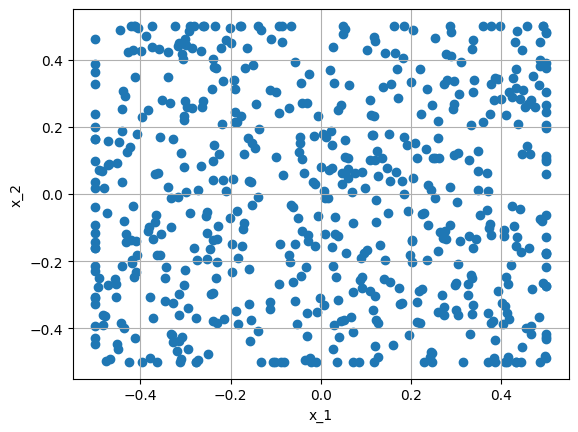

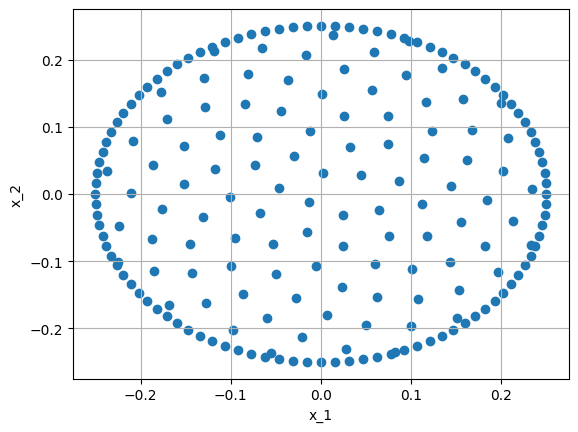

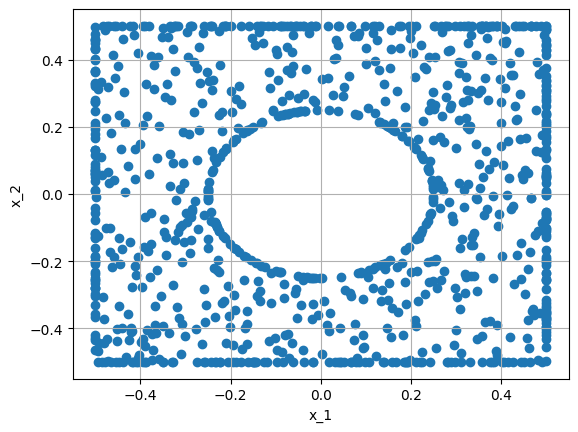

In [26]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [-0.5,-0.5], [0.5,-0.5], [-0.5,0.5]) # unit square
C = dp.domains.Circle(X, [0,0], 0.25) # unit circle

intersect = R - C
random_R = dp.samplers.RandomUniformSampler(R, n_points=500) + dp.samplers.RandomUniformSampler(R.boundary, n_points=100) # 50 random points
grid_C = dp.samplers.GridSampler(C, n_points=100) + dp.samplers.GridSampler(C.boundary, n_points=100) # grid points with density 10

random_intersect = dp.samplers.LHSSampler(intersect, n_points=500) + dp.samplers.RandomUniformSampler(intersect.boundary, n_points=500) 

dp.utils.scatter(X, random_R)
dp.utils.scatter(X, grid_C)
dp.utils.scatter(X, random_intersect)